### **ATTENTION VISUALISATION - BERTje**

 * Vig, (2019), A multiscale visualization of attention in the transformer model

 * Import torch and visualisation models

In [1]:
import torch
import head_view, model_view
from head_view import head_view
from model_view import model_view



* Install transformers, load transformer BERTje tokenizer and model.
* We use Hugging Face transformers
* https://huggingface.co/models


In [2]:
!pip install transformers
from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("wietsedv/bert-base-dutch-cased")
model = AutoModel.from_pretrained("wietsedv/bert-base-dutch-cased", output_attentions=True)

tokenizer_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/437M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at wietsedv/bert-base-dutch-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**EXERCISE 1 : which layer is most representative for Subject verb object  (SV0) dependency relations?**

* Check the layer that is most representative for SVO dependencies applied to the sentence: "Daarmee won ze voor het eerst de verkiezingen." **Search for a matrix cell, with most attention in the X and Y axis intersection, between verb and subject**. Change layer values, but set the head value to 0.
* What linguistic 'reasoning' does layer 6 exhibit?
* Compare the tokenization for sentences "Daarmee won ze voor het eerst de verkiezingen." ('And so she won the elections for the first time') and "Daarmee wonnen de politica's voor het eerst de parlementsverkiezingen." ('And so the politicians won the parliamentary elections for the first time'). What is the advantage of the tokenization level in the 2nd sentence?
* Suppose you want to extract only the words with most attention. What is the disadvantage of the 2nd tokenization format, and how would you tackle this?

In [3]:
sentence="Daarmee won ze voor het eerst de verkiezingen."
#sentence="Daarmee wonnen de politica's voor het eerst de parlementsverkiezingen."

Apply tokenizer and model to input sentence

In [4]:
inputs = tokenizer.encode(sentence.lower(), return_tensors='pt')
outputs = model(inputs)
attention = outputs[-1]  # Output includes attention weights when output_attentions=True
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

Specify layer and head,
For instance for layer 4, head 2:

    #### SPECIFY LAYER + HEAD
    head_view(attention, tokens, 4, 2)
    ####

Running the cell below generates:
* a matrix with attention values
* Left and right column with lines representing self-attention between tokens

The layer can be specified, and the head colour below can be selected.

<IPython.core.display.Javascript object>

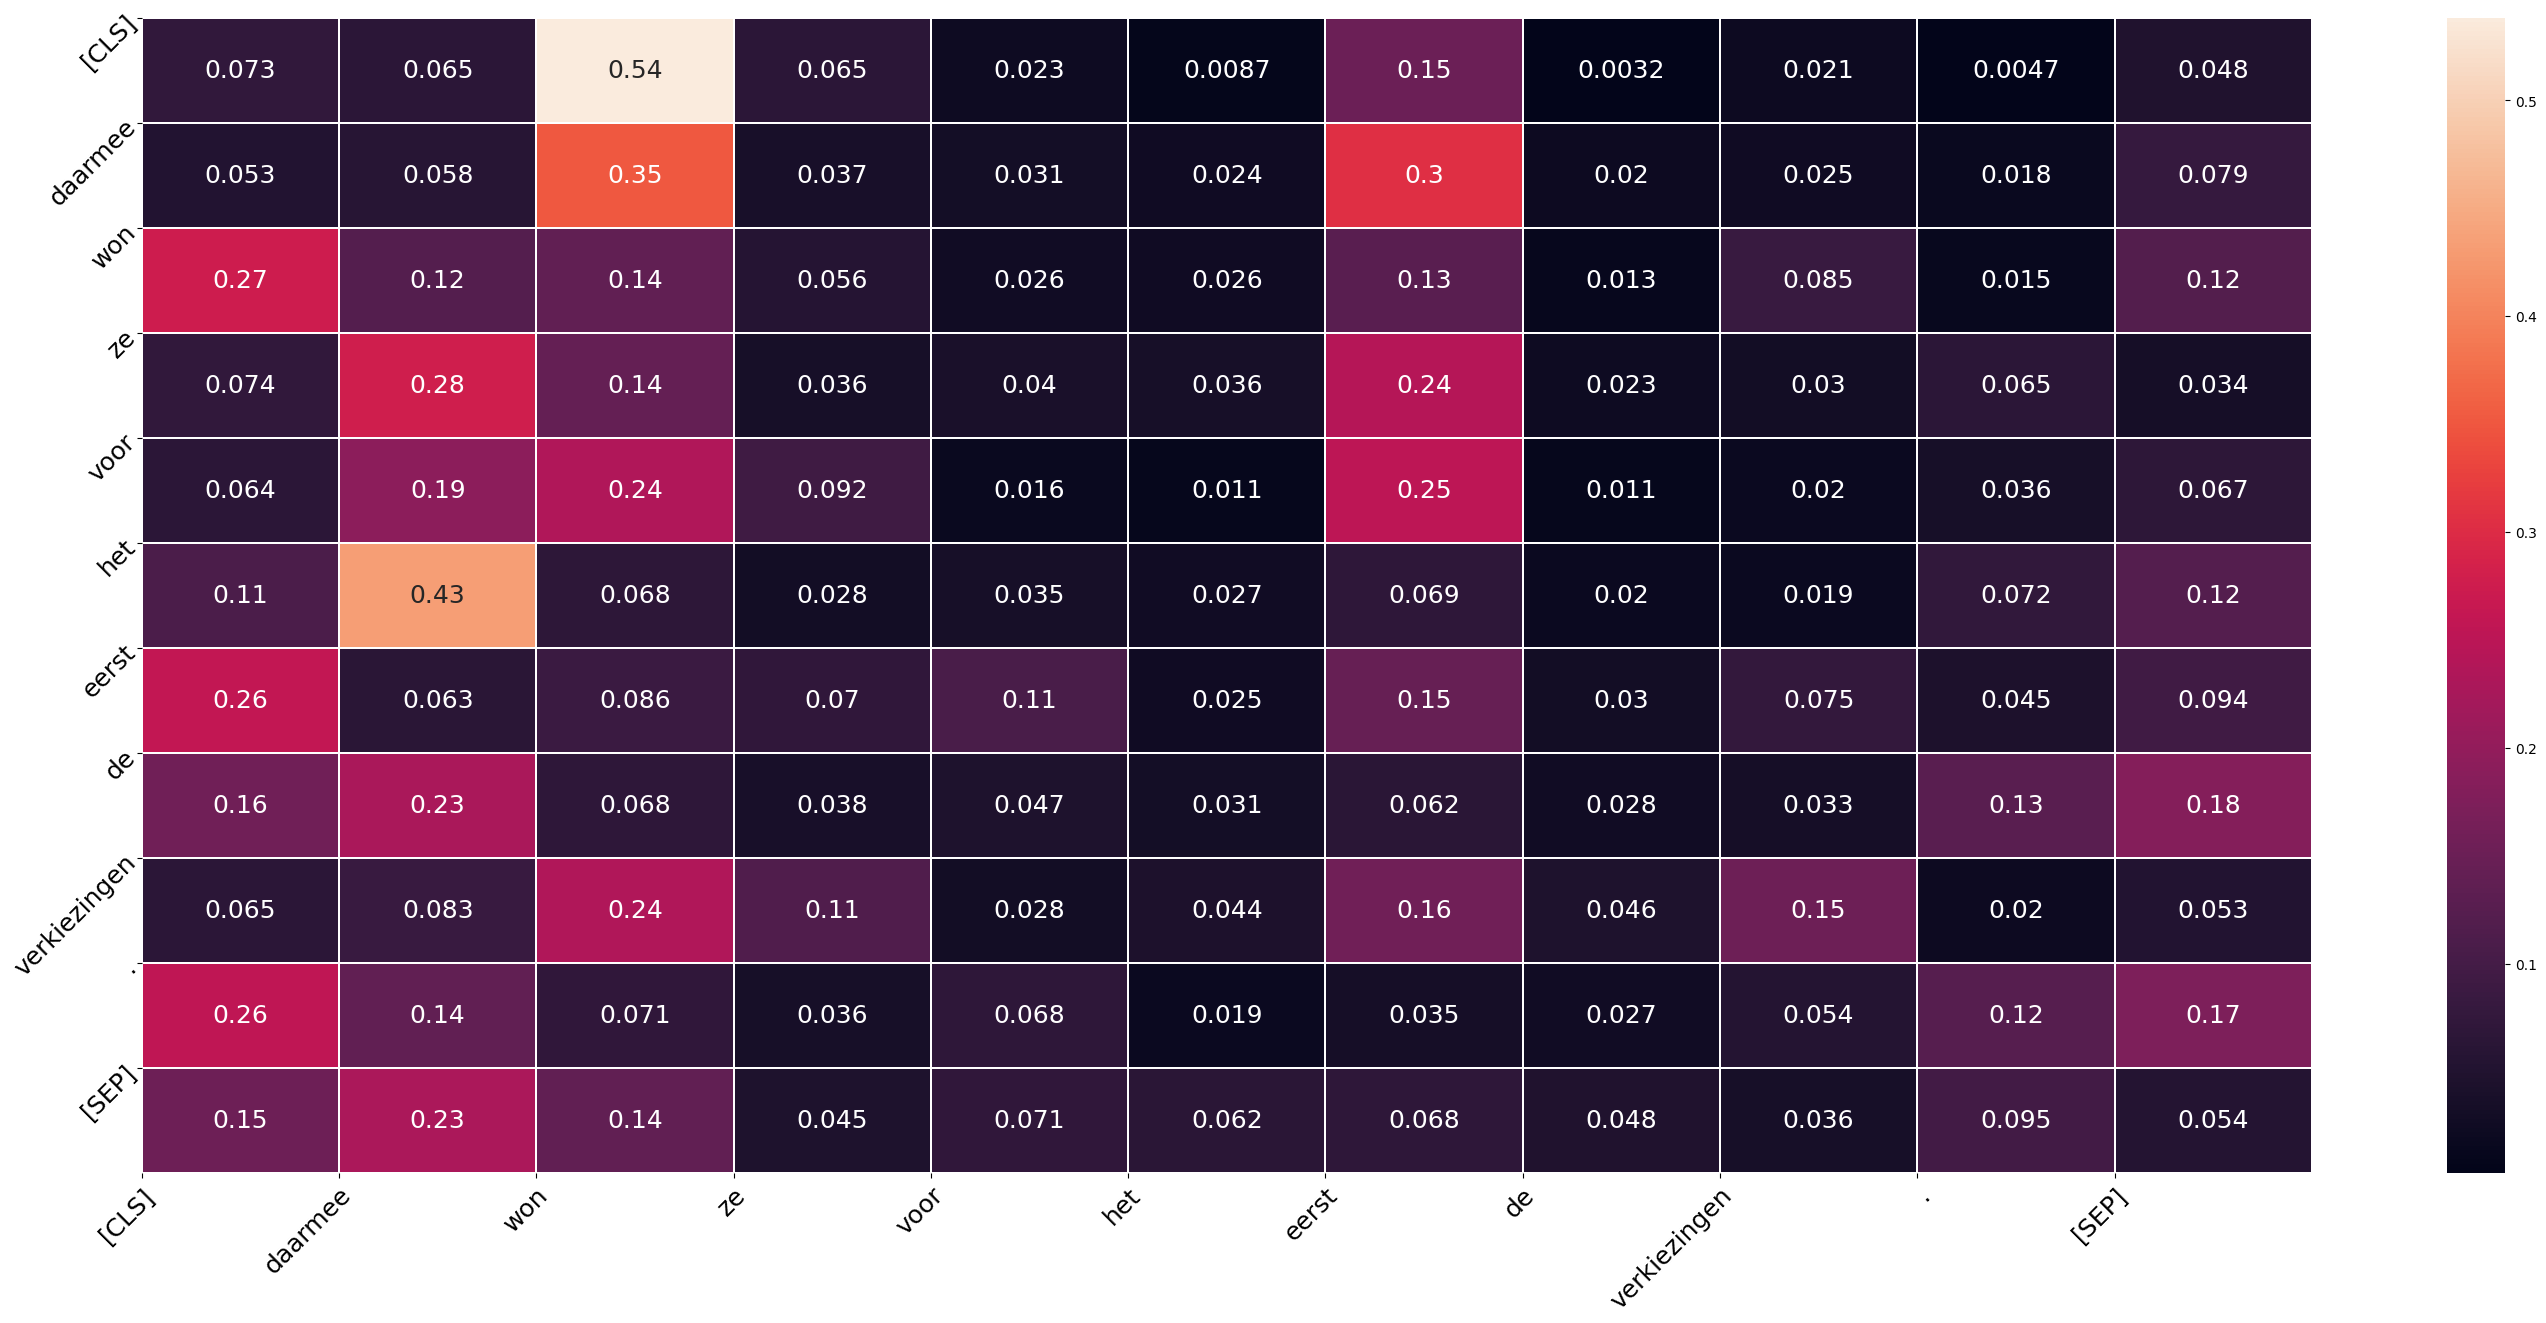

In [5]:
from head_view import head_view
#head_view(attention, tokens, layer_value, head_value)
head_view(attention, tokens, 0, 0)

**EXERCISE 2 : coreference**

Each cell of the 144 (12 x 12) transformer cells represents a 'linguistic process'. These can be visualized.

Self-attentions can be visualized within a sentence (sentence A), but also between two sentences (sentence A, sentence B). This can be useful for question answering in for instance chatbots.

The show_model_view function allows the next possible self-attentions to be visualized:

    #### Possible attention visualizations:
    All
    Sentence A -> Sentence A
    Sentence A -> Sentence B
    Sentence B -> Sentence A
    Sentence B -> Sentence B
    ####


1. Visualise coreference linguistic tasks in attention **layer 8, head 11**, for 'verkiezingen' and 'ze' for the sentences:
* sentence_a ="wonnen deze politica's de verkiezingen?" ('Did these politicians win the elections?')

* sentence_b ="ja, ze wonnen **ze** voor het eerst." ('Yes, they won **them** for the first time')

In the resulting matrix image of 12 x 12 cells, hover your mouse over **'ze'** ('them') on the left. Is the coreference relation correct?

Repeat this, but modify  "ja, ze wonnen **ze** voor het eerst." to "ja, ze wonnen **deze** voor het eerst." ('Yes, they won **these** for the first time')

Hover your mouse over **'deze'** ('these') on the left. How is the coreference now?

* Could you hypothesize about the difference between these 2 cases ?

2. Which 'implicit' linguistic reasoning processes can you see in cells (layer 4, head 1) and (layer 6, head 9)


In [ ]:
def show_model_view(model, tokenizer, sentence_a, sentence_b=None, hide_delimiter_attn=False, display_mode="dark"):
    inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt', add_special_tokens=True)
    input_ids = inputs['input_ids']
    if sentence_b:
        token_type_ids = inputs['token_type_ids']
        attention = model(input_ids, token_type_ids=token_type_ids)[-1]
        sentence_b_start = token_type_ids[0].tolist().index(1)
    else:
        attention = model(input_ids)[-1]
        sentence_b_start = None
    input_id_list = input_ids[0].tolist() # Batch index 0
    tokens = tokenizer.convert_ids_to_tokens(input_id_list)
    if hide_delimiter_attn:
        for i, t in enumerate(tokens):
            if t in ("[SEP]", "[CLS]"):
                for layer_attn in attention:
                    layer_attn[0, :, i, :] = 0
                    layer_attn[0, :, :, i] = 0
    model_view(attention, tokens, sentence_b_start, display_mode=display_mode)

Insert 2 sentence strings for sentence_a and sentence_b

In [ ]:
#outcomment 1st sentence_b(1), and then sentence_b(2)

sentence_a ="Wonnen deze politica's de verkiezingen?"
sentence_b ="Ja, zij wonnen ze voor het eerst."
#sentence_b ="ja, zij wonnen deze voor het eerst."
show_model_view(model, tokenizer, sentence_a.lower(), sentence_b.lower(), hide_delimiter_attn=False, display_mode="dark")